In [1133]:
import json
import pandas as pd
from pandas import DataFrame
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import scale
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, mean_squared_error
from sklearn.preprocessing import Imputer, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, log_loss
from sklearn import ensemble
from sklearn.ensemble import RandomForestRegressor

In [1134]:
mylist = []
for line in open('driver-16703.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_16703 = df_sorted

data_cst_16703 = data_cst_16703.groupby(data_cst_16703['id'], axis=0).sum()
# data_cst_1670['u15m']= data_cst_16703['u14m'].median()
data_cst_16703['month'] = '2'
data_cst_16703 = data_cst_16703.reset_index()
print(data_cst_16703.head())
print(data_cst_16703.info())

       id    c0k    c0m  c10k  c10m  c11k  c11m  c12k  c12m  c13k  ...    u6k  \
0  471053  153.0  153.0  13.0   0.0   2.0   0.0   0.0   0.0   0.0  ...    0.0   
1  471377  222.0  222.0  27.0   1.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   
2  471381  165.0  165.0  18.0   0.0   0.0   0.0   0.0   0.0   1.0  ...    2.0   
3  471383  202.0  202.0  22.0   0.0   1.0   0.0   0.0   0.0   0.0  ...    2.0   
4  471385  175.0  175.0  12.0   0.0   0.0   0.0   0.0   0.0   0.0  ...    0.0   

    u6m   u7k  u7m   u8k  u8m  u9k  u9m   uobs  month  
0  29.0  13.0  1.0  15.0  0.0  1.0  1.0  463.0      2  
1  80.0  11.0  1.0  44.0  0.0  0.0  0.0  699.0      2  
2  33.0  19.0  4.0  50.0  3.0  3.0  0.0  458.0      2  
3  69.0  38.0  2.0  62.0  5.0  3.0  2.0  676.0      2  
4  27.0  13.0  0.0  21.0  0.0  0.0  0.0  548.0      2  

[5 rows x 96 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Data columns (total 96 columns):
id       529 non-null int64
c0k      529 non-null

In [1135]:
mylist = []
for line in open('194_jan_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_jan = df_sorted

data_cst_jan = data_cst_jan.groupby(data_cst_jan['id'], axis=0).sum()
data_cst_jan['u15m']= data_cst_jan['u14m'].median()
data_cst_jan['month'] = '1'
data_cst_jan = data_cst_jan.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [1136]:
mylist = []
for line in open('194_feb_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_feb = df_sorted

data_cst_feb = data_cst_feb.groupby(data_cst_feb['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_feb['month'] = '2'
data_cst_feb = data_cst_feb.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [1137]:
mylist = []
for line in open('194_mar_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_mar = df_sorted

data_cst_mar = data_cst_mar.groupby(data_cst_mar['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_mar['month'] = '3'
data_cst_mar = data_cst_mar.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [1138]:
mylist = []
for line in open('194_apr_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_apr = df_sorted

data_cst_apr = data_cst_apr.groupby(data_cst_apr['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_apr['month'] = '4'
data_cst_apr = data_cst_apr.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [1139]:
mylist = []
for line in open('194_may_18.json'):
    mylist.append(json.loads(line.rstrip()))

df = DataFrame.from_records(mylist)
df =  df.fillna(0)

df_sorted = df.sort_values('id')
data_cst_may = df_sorted

data_cst_may = data_cst_may.groupby(data_cst_may['id'], axis=0).sum()
# data_cst['u15m']= data_cst['u14m'].median()
data_cst_may['month'] = '5'
data_cst_may = data_cst_may.reset_index()
# print(data_cst.head())
# print(data_cst.info())

In [1140]:
dframes =[data_cst_jan, data_cst_feb, data_cst_mar, data_cst_apr, data_cst_may]
dframes = pd.concat(dframes)
dframes = dframes.set_index(['month','id'])
# print(dframes.head())
# print(dframes.tail())

In [1141]:
def get_total_counts(item):
    count0_5m = (item['c1m'] + item['c2m'] + item['c3m'] + item['c4m'] + item['c5m'] +
                 item['u1m'] + item['u2m'] + item['u3m'] + item['u4m'] + item['u5m'])

    count6_10m = (item['c6m'] + item['c7m'] + item['c8m'] + item['c9m'] + item['c10m'] +
                  item['u6m'] + item['u7m'] + item['u8m'] + item['u9m'] +  item['u10m'])

    count11_15m = (item['c11m'] + item['c12m'] + item['c13m'] + item['c14m'] + item['c15m'] +
                   item['u11m'] + item['u12m'] + item['u13m'] + item['u14m'] + item['u15m'])

    count16_upm = item['c16m+'] + item['u16m+']
    return count0_5m, count6_10m, count11_15m, count16_upm

In [1142]:
dframes['count_total_observations'] = dframes['obs']
(dframes['count0_5M'],
dframes['count6_10M'],
dframes['count11_15M'],
dframes['count16_upM']) = get_total_counts(dframes)

# print(dframes.head())
# print(dframes.tail())

In [1143]:
def compute_weighted_values(item):

    item['obs'] = item['obs'].astype(int)
    item['count0_5M'] = item['count0_5M'].astype(int)
    item['count6_10M'] = item['count6_10M'].astype(int)
    item['count11_15M'] = item['count11_15M'].astype(int)
    item['count16_upM'] = item['count16_upM'].astype(int)

    i = item['count0_5M'] + item['count6_10M'] + item['count11_15M'] + item['count16_upM']
    weighted_i = (item['count0_5M'] + (item['count6_10M'] * 4) + (item['count11_15M'] * 7) + (item['count16_upM']*10))

    weighted_obs = (item['obs'] - i + weighted_i)
    weighted_i_rate= round(weighted_i.astype(float) / weighted_obs.astype(float) * 100.0, 2)
    return i, weighted_i, weighted_obs, weighted_i_rate

In [1144]:
(dframes['i'],
dframes['weighted_i'],
dframes['weighted_obs'],
dframes['weighted_i_rate']) = compute_weighted_values(dframes)

# print(dframes.head())
# print(dframes.tail())

In [1145]:
SCALE_MIN = 350
SCALE_MAX = 850

scale_range = SCALE_MAX - SCALE_MIN
dframes['score'] = round((100 - dframes['weighted_i_rate']) * scale_range / 100.0 + SCALE_MIN, 2)

dframes = dframes.reset_index()
dframes = dframes.fillna(0)
# print(dframes.info())
# print(dframes.head())

# dframes['id'] = dframes['id'].astype(str)

score_sorted = dframes.sort_values('month')

In [1146]:
data_cst_16703['count_total_observations'] = data_cst_16703['obs']
(data_cst_16703['count0_5M'],
data_cst_16703['count6_10M'],
data_cst_16703['count11_15M'],
data_cst_16703['count16_upM']) = get_total_counts(data_cst_16703)

In [1147]:
(data_cst_16703['i'],
data_cst_16703['weighted_i'],
data_cst_16703['weighted_obs'],
data_cst_16703['weighted_i_rate']) = compute_weighted_values(data_cst_16703)

# print(data_cst_16703.head())
# print(data_cst_16703.tail())

In [1148]:
SCALE_MIN = 350
SCALE_MAX = 850

scale_range = SCALE_MAX - SCALE_MIN
data_cst_16703['score'] = round((100 - data_cst_16703['weighted_i_rate']) * scale_range / 100.0 + SCALE_MIN, 2)

data_cst_16703 = data_cst_16703.reset_index()
data_cst_16703 = data_cst_16703.fillna(0)
print(data_cst_16703.info())
print(data_cst_16703.head())

scores_16703 = data_cst_16703[['id', 'score']]
print(scores_16703.info())
print(scores_16703.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 529 entries, 0 to 528
Columns: 107 entries, index to score
dtypes: float64(94), int64(12), object(1)
memory usage: 442.3+ KB
None
   index      id    c0k    c0m  c10k  c10m  c11k  c11m  c12k  c12m   ...    \
0      0  471053  153.0  153.0  13.0   0.0   2.0   0.0   0.0   0.0   ...     
1      1  471377  222.0  222.0  27.0   1.0   0.0   0.0   0.0   0.0   ...     
2      2  471381  165.0  165.0  18.0   0.0   0.0   0.0   0.0   0.0   ...     
3      3  471383  202.0  202.0  22.0   0.0   1.0   0.0   0.0   0.0   ...     
4      4  471385  175.0  175.0  12.0   0.0   0.0   0.0   0.0   0.0   ...     

   count_total_observations  count0_5M  count6_10M  count11_15M  count16_upM  \
0                       659         95          47            2            0   
1                       981        128         110            0            0   
2                       680        160          62            2            0   
3                       939    

In [1149]:
dframes['driver'] = pd.Series(range(1,(len(dframes['id']) + 1)))


df_raw_values = dframes[['month', 'driver', 'c0m', 'c1m', 'c2m', 'c3m', 'c4m', 'c5m', 'c6m', 'c7m', 'c8m', 'c9m', 'c10m', 'c11m', 'c12m', 'c13m', 'c14m', 'c15m', 'c16m+', 
                         'u0m', 'u1m', 'u2m', 'u3m', 'u4m', 'u5m', 'u6m', 'u7m', 'u8m', 'u9m', 'u10m', 'u11m', 'u12m', 'u13m', 'u14m', 'u15m', 'u16m+', 'score']]

# print(df_raw_values.head())
# print(df_raw_values.tail())




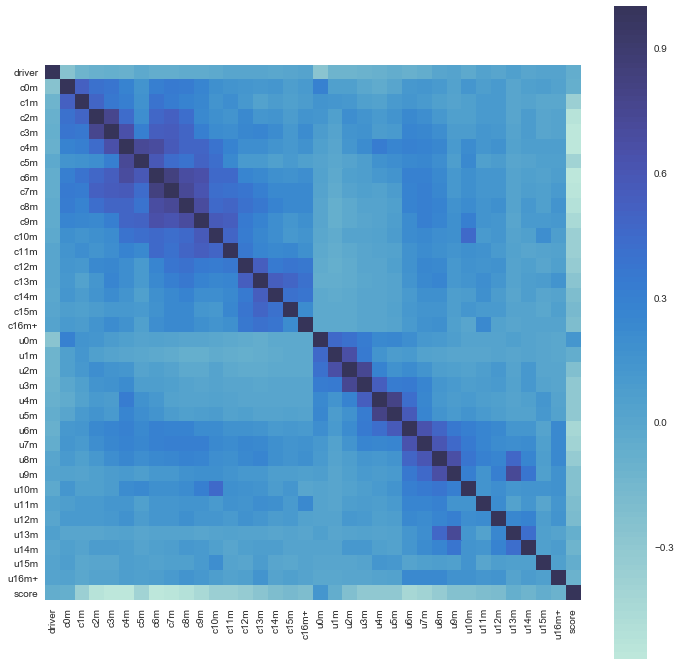

In [1150]:
cm = df_raw_values.corr()
plt.figure(figsize = (12,12))
sns.heatmap(cm, square=True, center=1.5)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.show()

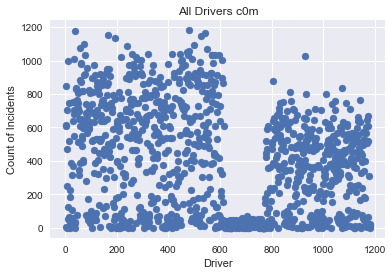

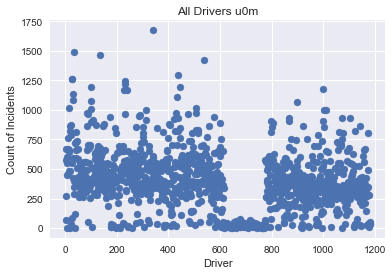

In [1151]:
plt.scatter(df_raw_values['driver'], df_raw_values['c0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('All Drivers c0m')
plt.show()

plt.scatter(df_raw_values['driver'], df_raw_values['u0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('All Drivers u0m')
plt.show()

In [1152]:
#drop drivers who have very few data points, drops from 1182 to 805 drivers
df_raw_values_trim = df_raw_values.drop(df_raw_values[df_raw_values.c0m < 75].index)

print(df_raw_values_trim.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 805 entries, 1 to 1176
Data columns (total 37 columns):
month     805 non-null object
driver    805 non-null int64
c0m       805 non-null float64
c1m       805 non-null float64
c2m       805 non-null float64
c3m       805 non-null float64
c4m       805 non-null float64
c5m       805 non-null float64
c6m       805 non-null float64
c7m       805 non-null float64
c8m       805 non-null float64
c9m       805 non-null float64
c10m      805 non-null float64
c11m      805 non-null float64
c12m      805 non-null float64
c13m      805 non-null float64
c14m      805 non-null float64
c15m      805 non-null float64
c16m+     805 non-null float64
u0m       805 non-null float64
u1m       805 non-null float64
u2m       805 non-null float64
u3m       805 non-null float64
u4m       805 non-null float64
u5m       805 non-null float64
u6m       805 non-null float64
u7m       805 non-null float64
u8m       805 non-null float64
u9m       805 non-null float6

# look at outliers

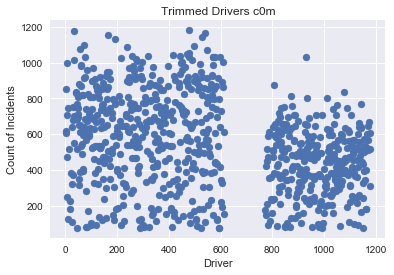

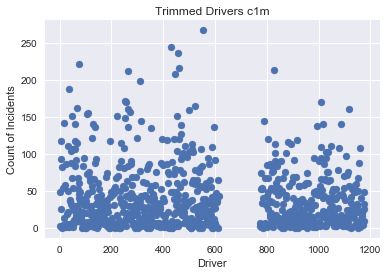

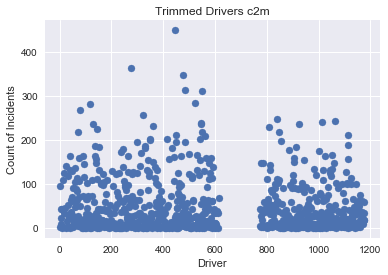

In [1153]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c0m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c1m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c1m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c2m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c2m')
plt.show()

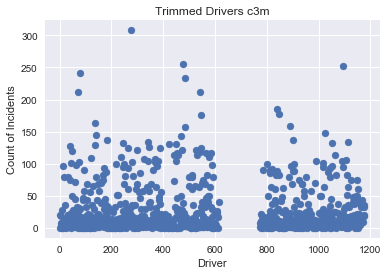

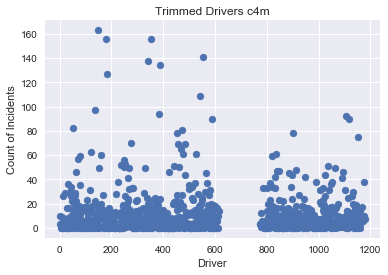

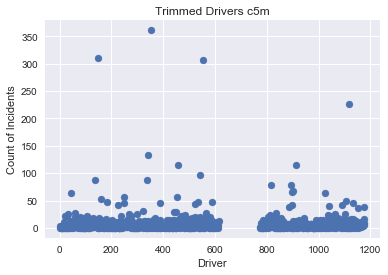

In [1154]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c3m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c3m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c4m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c4m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c5m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c5m')

plt.show()


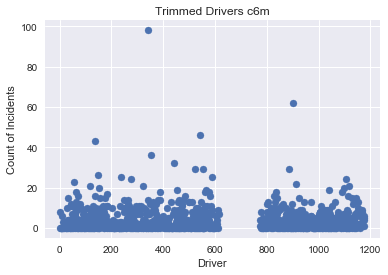

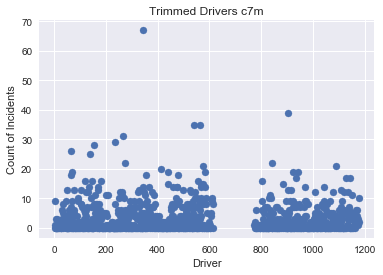

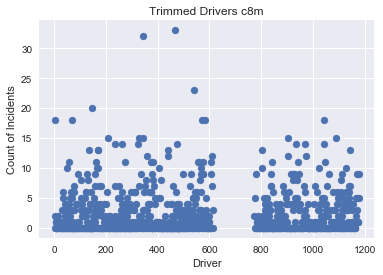

In [1155]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c6m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c6m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c7m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c7m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c8m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c8m')
plt.show()

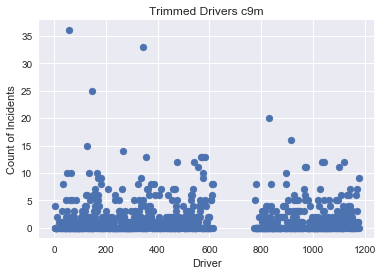

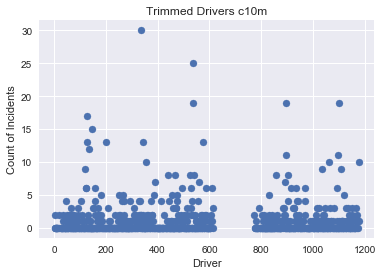

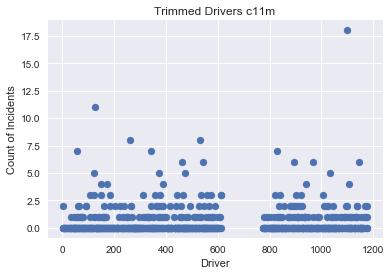

In [1156]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c9m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c9m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c10m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c10m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c11m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c11m')
plt.show()




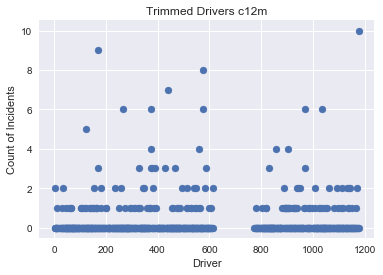

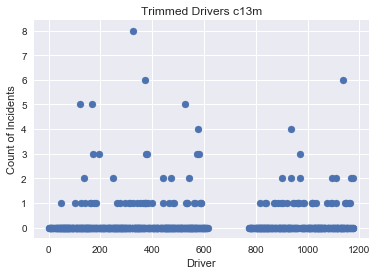

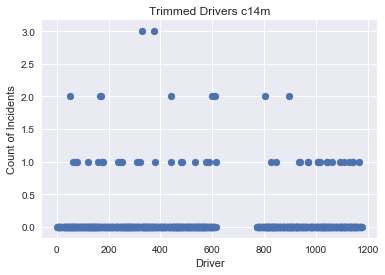

In [1157]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c12m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c12m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c13m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c13m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c14m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c14m')
plt.show()


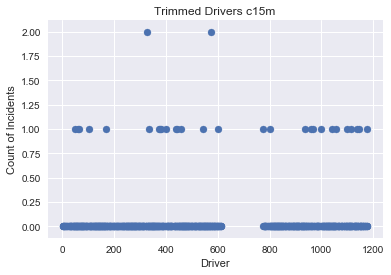

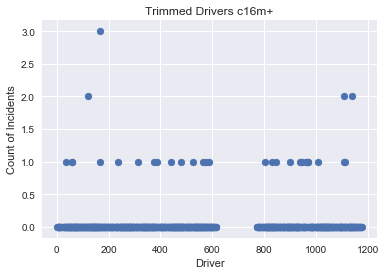

In [1158]:
plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c15m'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c15m')
plt.show()

plt.scatter(df_raw_values_trim['driver'], df_raw_values_trim['c16m+'])
plt.ylabel('Count of Incidents')
plt.xlabel('Driver')
plt.title('Trimmed Drivers c16m+')
plt.show()



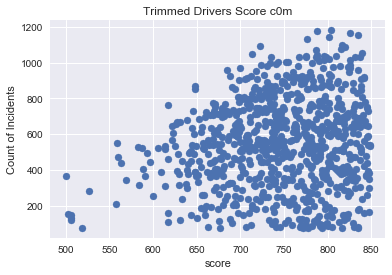

In [1159]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c0m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c0m')

plt.show()

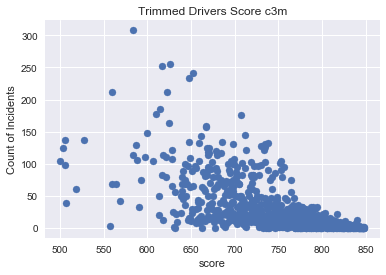

In [1160]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c3m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c3m')

plt.show()

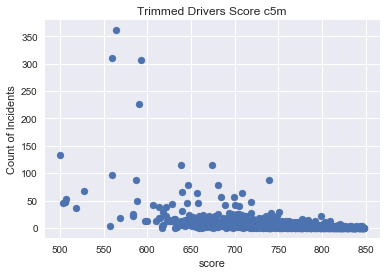

In [1161]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c5m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c5m')

plt.show()

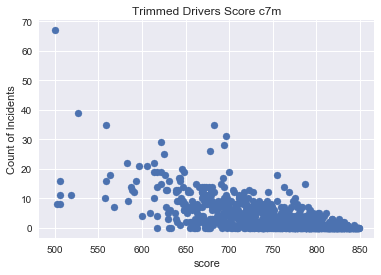

In [1162]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c7m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c7m')

plt.show()

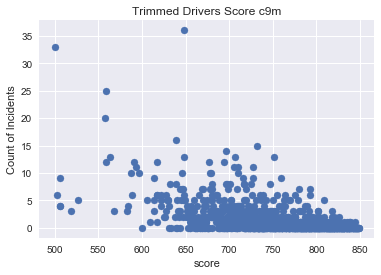

In [1163]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c9m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c9m')
plt.show()

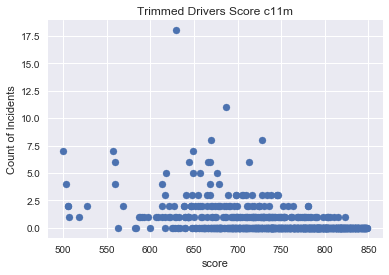

In [1164]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c11m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c11m')

plt.show()

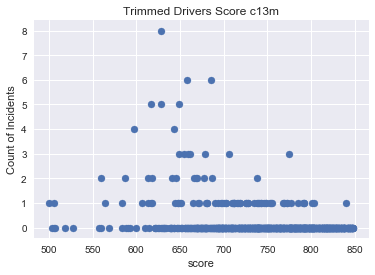

In [1165]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c13m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c13m')

plt.show()

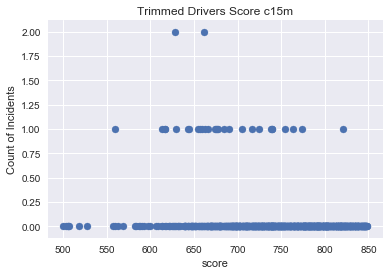

In [1166]:
plt.scatter(df_raw_values_trim['score'], df_raw_values_trim['c15m'])
plt.ylabel('Count of Incidents')
plt.xlabel('score')
plt.title('Trimmed Drivers Score c15m')
plt.show()




In [1167]:
df_raw_values_trim = df_raw_values_trim.drop(df_raw_values_trim[df_raw_values_trim.c1m < 50].index)
df_raw_values_trim = df_raw_values_trim.drop(df_raw_values_trim[df_raw_values_trim.c2m < 50].index)
# df_raw_values_trim = df_raw_values_trim.drop(df_raw_values_trim[df_raw_values_trim.c3m < 25].index)




In [1168]:
X = df_raw_values_trim.drop(['score', 'month', 'driver'], axis=1).values
y = df_raw_values_trim['score'].values
print(X.shape, y.shape)

(151, 34) (151,)


In [1169]:
data_cst_16703['driver'] = pd.Series(range(1,(len(data_cst_16703['id']) + 1)))
# print(data_cst_16703)

df_16703 = data_cst_16703[['c0m', 'c1m', 'c2m', 'c3m', 'c4m', 'c5m', 'c6m', 'c7m', 'c8m', 'c9m', 'c10m', 'c11m', 'c12m', 'c13m', 'c14m', 'c15m', 'c16m+', 
                         'u0m', 'u1m', 'u2m', 'u3m', 'u4m', 'u5m', 'u6m', 'u7m', 'u8m', 'u9m', 'u10m', 'u11m', 'u12m', 'u13m', 'u14m', 'u15m', 'u16m+']]
test_X = df_16703.values


print(test_X.shape)

(529, 34)


# Ridge regression alpha 0.1

In [1170]:
pl= Pipeline([('clf', Ridge(alpha=0.1, normalize=True))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

test_y_pred= pl.predict(test_X)
# print(test_y_pred)

Score of logreg 0.9511543836432482
Cross_Val Score of logreg, [ 0.44069375  0.83476425 -0.32808285  0.93496929  0.85604606]
Mean of Cross_val score: 0.5476781005269065


In [1171]:
se = pd.Series(test_y_pred)
scores_16703['pred_score_RR_0.1'] = se.values
print(scores_16703.head())



       id   score  pred_score_RR_0.1
0  471053  667.10         676.660630
1  471377  633.35         628.497932
2  471381  609.70         653.081285
3  471383  601.75         621.807935
4  471385  704.10         694.302933


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Ridge regression alpha 0.2

In [1172]:
pl= Pipeline([('clf', Ridge(alpha=0.2, normalize=True))])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

pl.fit(X_train, y_train)
accuracy= pl.score(X_test, y_test)

y_pred= pl.predict(X_test)
cv_results= cross_val_score(pl, X_test, y_test, cv=5)

print('Score of logreg {}' .format(pl.score(X_test, y_test)))
print('Cross_Val Score of logreg, {}' .format(cv_results))
print('Mean of Cross_val score: {}'.format(np.mean(cv_results)))

test_y_pred= pl.predict(test_X)
# print(test_y_pred)

Score of logreg 0.9412098179225541
Cross_Val Score of logreg, [ 0.44314917  0.85112602 -0.27811961  0.90706567  0.81461589]
Mean of Cross_val score: 0.5475674291116384


In [1173]:
se = pd.Series(test_y_pred)
scores_16703['pred_score_RR_0.2'] = se.values
print(scores_16703.head())

       id   score  pred_score_RR_0.1  pred_score_RR_0.2
0  471053  667.10         676.660630         675.799358
1  471377  633.35         628.497932         622.139271
2  471381  609.70         653.081285         655.149175
3  471383  601.75         621.807935         620.247664
4  471385  704.10         694.302933         691.805992


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


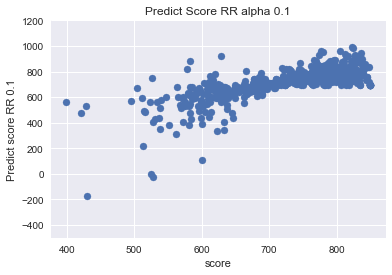

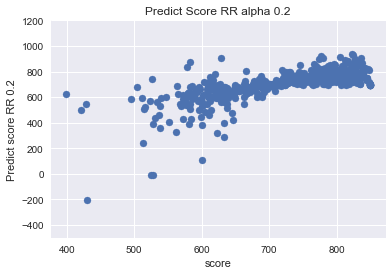

In [1174]:
plt.scatter(scores_16703['score'], scores_16703['pred_score_RR_0.1'])
plt.ylabel('Predict score RR 0.1')
plt.xlabel('score')
plt.ylim(-500, 1200)

plt.title('Predict Score RR alpha 0.1')

plt.show()

plt.scatter(scores_16703['score'], scores_16703['pred_score_RR_0.2'])
plt.ylabel('Predict score RR 0.2')
plt.xlabel('score')
plt.ylim(-500, 1200)

plt.title('Predict Score RR alpha 0.2')

plt.show()